In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
df.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

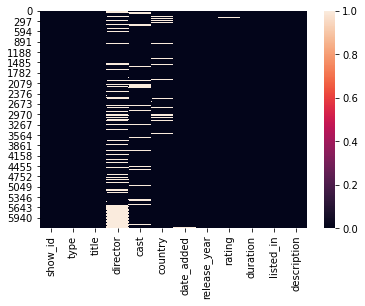

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.drop(df.columns[[0,1,5,6,7,9]], axis=1, inplace=True)

In [8]:
df

,title,director,cast,rating,listed_in,description
0,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...",TV-PG,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Jandino: Whatever it Takes,NaN,Jandino Asporaat,TV-MA,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",TV-Y7-FV,Kids' TV,"With the help of three human allies, the Autob..."
3,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",TV-Y7,Kids' TV,When a prison ship crash unleashes hundreds of...
4,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",TV-14,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...
6229,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",NR,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",TV-MA,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,Movies,Nursery rhymes and original music for children...
6232,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",TV-MA,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [9]:
df.isnull().sum()

title             0
director       1969
cast            570
rating           10
listed_in         0
description       0
dtype: int64

In [10]:
df.shape

(6234, 6)

In [11]:
null_rows = len(df[df.isna().any(axis=1)])
print(f'Rows with NaNs: {null_rows} ({(null_rows/df.shape[0])*100:.0f}%)')

Rows with NaNs: 2329 (37%)


In [12]:
df.fillna('', inplace=True)
df.head()

,title,director,cast,rating,listed_in,description
0,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...",TV-PG,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Jandino: Whatever it Takes,,Jandino Asporaat,TV-MA,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,Transformers Prime,,"Peter Cullen, Sumalee Montano, Frank Welker, J...",TV-Y7-FV,Kids' TV,"With the help of three human allies, the Autob..."
3,Transformers: Robots in Disguise,,"Will Friedle, Darren Criss, Constance Zimmer, ...",TV-Y7,Kids' TV,When a prison ship crash unleashes hundreds of...
4,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",TV-14,Comedies,When nerdy high schooler Dani finally attracts...


In [13]:
df[['director','cast']] =df[['director','cast']].applymap(lambda x: ' '.join(x.replace(' ', '').split(',')[:3]))
df.head()

,title,director,cast,rating,listed_in,description
0,Norm of the North: King Sized Adventure,RichardFinn TimMaltby,AlanMarriott AndrewToth BrianDobson,TV-PG,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Jandino: Whatever it Takes,,JandinoAsporaat,TV-MA,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,Transformers Prime,,PeterCullen SumaleeMontano FrankWelker,TV-Y7-FV,Kids' TV,"With the help of three human allies, the Autob..."
3,Transformers: Robots in Disguise,,WillFriedle DarrenCriss ConstanceZimmer,TV-Y7,Kids' TV,When a prison ship crash unleashes hundreds of...
4,#realityhigh,FernandoLebrija,NestaCooper KateWalsh JohnMichaelHiggins,TV-14,Comedies,When nerdy high schooler Dani finally attracts...


In [14]:
df['title_dup'] = df['title']

In [15]:
title = df.apply(' '.join, axis=1)

In [16]:
title

0       Norm of the North: King Sized Adventure Richar...
1       Jandino: Whatever it Takes  JandinoAsporaat TV...
2       Transformers Prime  PeterCullen SumaleeMontano...
3       Transformers: Robots in Disguise  WillFriedle ...
4       #realityhigh FernandoLebrija NestaCooper KateW...
                              ...                        
6229    Red vs. Blue  BurnieBurns JasonSaldaña Gustavo...
6230    Maron  MarcMaron JuddHirsch JoshBrener TV-MA T...
6231    Little Baby Bum: Nursery Rhyme Friends    Movi...
6232    A Young Doctor's Notebook and Other Stories  D...
6233    Friends  JenniferAniston CourteneyCox LisaKudr...
Length: 6234, dtype: object

In [17]:
tfidf_vect = TfidfVectorizer(lowercase=True, stop_words='english', ngram_range=(1, 3), max_df = .5)
tfidf= tfidf_vect.fit_transform(title)

In [18]:
tfidf

<6234x274788 sparse matrix of type '<class 'numpy.float64'>'
	with 456498 stored elements in Compressed Sparse Row format>

In [19]:
pickle.dump(tfidf, open('tfidf.pickle', 'wb'))

In [20]:
vectr = cosine_similarity(tfidf, tfidf)

In [21]:
pd.DataFrame(data=vectr, index=df['title'], columns=df['title']).head()

title,Norm of the North: King Sized Adventure,Jandino: Whatever it Takes,Transformers Prime,Transformers: Robots in Disguise,#realityhigh,Apaches,Automata,Fabrizio Copano: Solo pienso en mi,Fire Chasers,Good People,...,Anthony Bourdain: Parts Unknown,Frasier,La Familia P. Luche,The Adventures of Figaro Pho,Kikoriki,Red vs. Blue,Maron,Little Baby Bum: Nursery Rhyme Friends,A Young Doctor's Notebook and Other Stories,Friends
title,,,,,,,,,,,,,,,,,,,,,
Norm of the North: King Sized Adventure,1.000000,0.000000,0.000000,0.000000,0.000965,0.001649,0.000482,0.001110,0.000000,0.003334,...,0.002357,0.003904,0.002765,0.000839,0.000000,0.003441,0.000922,0.002225,0.000833,0.001005
Jandino: Whatever it Takes,0.000000,1.000000,0.003175,0.002686,0.000000,0.001966,0.000000,0.033312,0.002080,0.000000,...,0.000000,0.000000,0.000000,0.002648,0.003399,0.000000,0.001837,0.000000,0.001658,0.000000
Transformers Prime,0.000000,0.003175,1.000000,0.088654,0.000000,0.000000,0.000000,0.000000,0.008425,0.000000,...,0.000000,0.000000,0.000000,0.012389,0.007363,0.000000,0.000000,0.000000,0.000000,0.000000
Transformers: Robots in Disguise,0.000000,0.002686,0.088654,1.000000,0.000000,0.000000,0.000000,0.000000,0.007126,0.000000,...,0.000000,0.000000,0.000000,0.024480,0.006227,0.000000,0.000000,0.000000,0.000000,0.000000
#realityhigh,0.000965,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001222,0.002958,0.001055,0.000000,0.001014,0.001160,0.000000,0.001048,0.003599


In [24]:
def recommended_shows(title):
    
    #Get show index
    title= df.index[df['title'] == title][0]
    
    #Get cosie similarity
    show_cos_sim = cosine_similarity(tfidf[title], tfidf).flatten()
    
    #Get the top 5 most similar shows
    sim_titles_vects = sorted(list(enumerate(show_cos_sim)), key=lambda x: x[1], reverse=True)[1:6]
    
    #Return result
    response = '\n'.join([f'{df.iloc[t_vect[0]][0]} --> confidence: {round(t_vect[1],1)}' for t_vect in sim_titles_vects])
    
    return response
print(recommended_shows('The Matrix'))

The Matrix Reloaded --> confidence: 0.4
The Matrix Revolutions --> confidence: 0.3
Jupiter Ascending --> confidence: 0.1
Terminator 3: Rise of the Machines --> confidence: 0.1
Sense8 --> confidence: 0.1


In [25]:
print(recommended_shows('Breaking Bad'))

El Camino: A Breaking Bad Movie --> confidence: 0.1
Better Call Saul --> confidence: 0.1
The Road to El Camino: Behind the Scenes of El Camino: A Breaking Bad Movie --> confidence: 0.1
Bad Blood --> confidence: 0.1
Ozark --> confidence: 0.1
